<a href="https://colab.research.google.com/github/goodu001/pandas_penguins/blob/main/Intermediate_Pandas_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## summarise dataframe
import numpy as np
import pandas as pd

penguins = pd.read_csv('penguins.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
penguins.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [ ]:
## AVG, mean
penguins['bill_length_mm'].median()

44.45

In [ ]:
# group by + sum/ mean
# 1. fillter and mean
penguins[penguins['species'] == 'Adelie']['bill_length_mm'].mean()


38.79139072847682

In [ ]:
# 2. group by
penguins.groupby('species')['bill_length_mm'].mean()

,bill_length_mm
species,
Adelie,38.791391
Chinstrap,48.833824
Gentoo,47.504878


In [ ]:
penguins.groupby('species')['bill_length_mm'].agg(['min', 'max', 'mean', 'std', 'median', 'count'])

,min,max,mean,std,median,count
species,,,,,,
Adelie,32.1,46.0,38.791391,2.663405,38.80,151
Chinstrap,40.9,58.0,48.833824,3.339256,49.55,68
Gentoo,40.9,59.6,47.504878,3.081857,47.30,123


In [ ]:
    ## group by more than one columns
result = penguins.groupby(['species', 'island'])['bill_length_mm'] \
    .agg(['min', 'max', 'mean']) \
    .reset_index()

In [ ]:
result


,species,island,min,max,mean
0,Adelie,Biscoe,34.5,45.6,38.975000
1,Adelie,Dream,32.1,44.1,38.501786
2,Adelie,Torgersen,33.5,46.0,38.950980
3,Chinstrap,Dream,40.9,58.0,48.833824
4,Gentoo,Biscoe,40.9,59.6,47.504878


In [ ]:
result.to_csv('result.csv')

In [ ]:
# map value MALE: m, FEMALE: f
penguins['sex_new'] = penguins['sex'].map({'MALE': 'm', 'FEMALE': 'f'})\
.fillna('unknown')

penguins.head(20)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_new
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,m
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,f
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,f
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,unknown
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,f
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,m
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE,f
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE,m
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,unknown
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,unknown


In [ ]:
##  pandas style
penguins['bill_length_mm'].mean()

43.9219298245614

In [ ]:
## numpy
import numpy as np
np.mean(penguins['bill_length_mm'])

43.9219298245614

In [ ]:
## other function munpy
print(np.sum(penguins['bill_length_mm']))
print(np.std(penguins['body_mass_g']))

15021.3
800.7812292384519


In [ ]:
score = pd.Series([80, 55, 65, 95, 45])
grade = np.where(score >= 80, 'PASS', 'FAILED')
print(grade)

['PASS' 'FAILED' 'FAILED' 'PASS' 'FAILED']


In [ ]:
df = penguins.query('species == "Adelie" ')[['species', 'island', 'bill_length_mm']].dropna()
df.head()

,species,island,bill_length_mm
0,Adelie,Torgersen,39.1
1,Adelie,Torgersen,39.5
2,Adelie,Torgersen,40.3
4,Adelie,Torgersen,36.7
5,Adelie,Torgersen,39.3


In [ ]:
df['new_column'] = np.where(df['bill_length_mm'] > 40, True, False)
print(df)

    species     island  bill_length_mm  new_column
0    Adelie  Torgersen            39.1       False
1    Adelie  Torgersen            39.5       False
2    Adelie  Torgersen            40.3        True
4    Adelie  Torgersen            36.7       False
5    Adelie  Torgersen            39.3       False
..      ...        ...             ...         ...
147  Adelie      Dream            36.6       False
148  Adelie      Dream            36.0       False
149  Adelie      Dream            37.8       False
150  Adelie      Dream            36.0       False
151  Adelie      Dream            41.5        True

[151 rows x 4 columns]


In [ ]:
## Merge Dataframes

left = {
    'key' : [1, 2, 3, 4],
    'name' : ['Dump', 'Nick', 'Mike', 'Joe'],
    'age' : [20, 50, 30, 25]
}

right = {
    'key' : [1, 2, 3, 4],
    'city' : ['Bankok', 'Tokyo', 'London', 'Seoul'],
    'zip' : [1001, 2002, 3002, 44455]
}

df_left = pd.DataFrame(left)
df_right = pd.DataFrame(right)

In [ ]:
df_result = pd.merge(df_left, df_right, on='key')

In [ ]:
print(df_result)

   key  name  age    city    zip
0    1  Dump   20  Bankok   1001
1    2  Nick   50   Tokyo   2002
2    3  Mike   30  London   3002
3    4   Joe   25   Seoul  44455


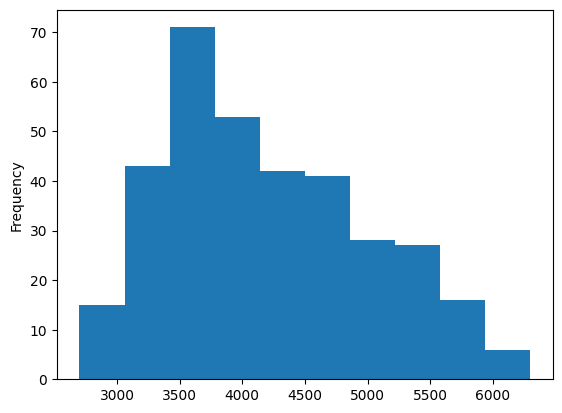

In [ ]:
## histogram one column
penguins['body_mass_g'].plot(kind='hist');

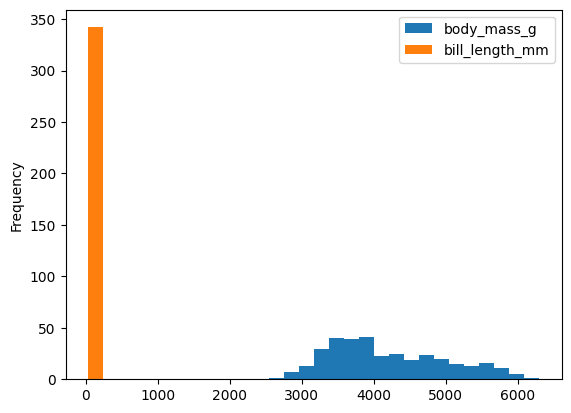

In [ ]:
## histogram two columns
penguins[['body_mass_g', 'bill_length_mm']].plot(kind='hist', bins = 30);

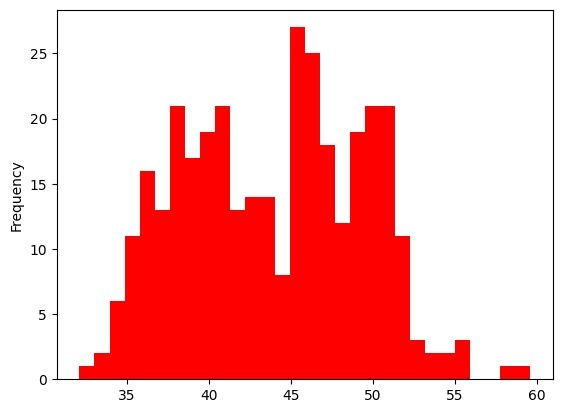

In [ ]:
penguins['bill_length_mm'].plot(kind='hist', bins = 30, color='red');

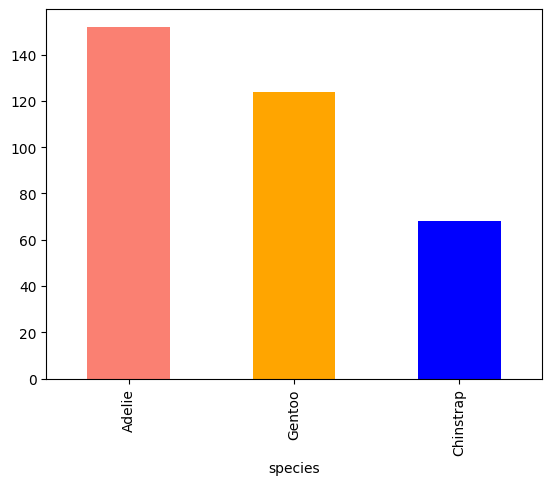

In [ ]:
# bar plot for species
penguins['species'].value_counts().plot(kind='bar', color=['salmon', 'orange', 'blue']);

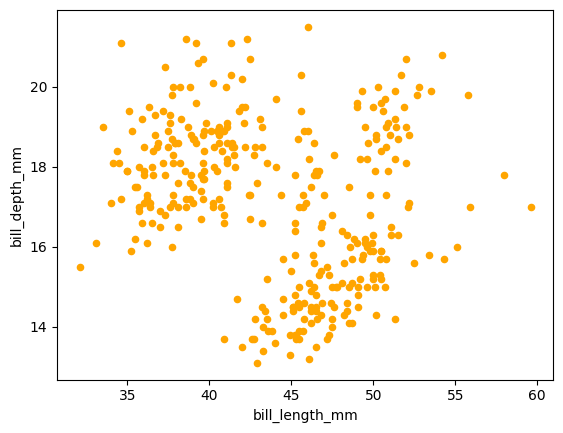

In [ ]:
## scatter plot
penguins[['bill_length_mm', 'bill_depth_mm']]\
.plot(kind='scatter', x='bill_length_mm', y='bill_depth_mm', color = 'orange');

In [ ]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_new
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,m
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,f
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,f
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,unknown
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,f
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,unknown
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,f
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,m
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,f


from matplotlib import pyplot as plt
penguins['bill_length_mm'].plot(kind='hist', bins=20, title='bill_length_mm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
penguins['bill_depth_mm'].plot(kind='hist', bins=20, title='bill_depth_mm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
penguins['flipper_length_mm'].plot(kind='hist', bins=20, title='flipper_length_mm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
penguins['body_mass_g'].plot(kind='hist', bins=20, title='body_mass_g')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
penguins.groupby('species').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
penguins.groupby('island').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
penguins.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
penguins.groupby('sex_new').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
penguins.plot(kind='scatter', x='bill_length_mm', y='bill_depth_mm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
penguins.plot(kind='scatter', x='bill_depth_mm', y='flipper_length_mm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
penguins.plot(kind='scatter', x='flipper_length_mm', y='body_mass_g', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
penguins['bill_length_mm'].plot(kind='line', figsize=(8, 4), title='bill_length_mm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
penguins['bill_depth_mm'].plot(kind='line', figsize=(8, 4), title='bill_depth_mm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
penguins['flipper_length_mm'].plot(kind='line', figsize=(8, 4), title='flipper_length_mm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
penguins['body_mass_g'].plot(kind='line', figsize=(8, 4), title='body_mass_g')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['island'].value_counts()
    for x_label, grp in penguins.groupby('species')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('species')
_ = plt.ylabel('island')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sex'].value_counts()
    for x_label, grp in penguins.groupby('island')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('island')
_ = plt.ylabel('sex')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sex_new'].value_counts()
    for x_label, grp in penguins.groupby('sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sex')
_ = plt.ylabel('sex_new')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(penguins['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(penguins, x='bill_length_mm', y='species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(penguins['island'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(penguins, x='bill_length_mm', y='island', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(penguins['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(penguins, x='bill_length_mm', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(penguins['sex_new'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(penguins, x='bill_length_mm', y='sex_new', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)